In [1]:
##python codes for the XGBoost machine learning model
#This model can calssify arc basalts from non-arc basalts
#Here, we extract the dara from "Parental training dataset" to train the XGBoost model

from __future__ import division, print_function, unicode_literals

# Check if the version of python is 3.5 and above
import sys
assert sys.version_info >= (3, 5)

# Check to see if sklearn is version 0.20 and above
import sklearn #
assert sklearn.__version__ >= "0.20"
from sklearn.decomposition import PCA
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import os 
from xgboost import XGBClassifier#
from sklearn.metrics import accuracy_score, r2_score, make_scorer, f1_score, recall_score, precision_score
from sklearn.model_selection import GridSearchCV#
from sklearn.model_selection import train_test_split#
from sklearn.metrics import roc_auc_score#
from sklearn.metrics import roc_curve, auc#
from sklearn.metrics import confusion_matrix#
import seaborn as sns
from sklearn.feature_selection import mutual_info_regression

np.random.seed(2022) 

# Make matplotlib diagrams work better
# matplotlib inline
import matplotlib as mpl
mpl.rc('axes', labelsize=14)
mpl.rc('xtick', labelsize=12)
mpl.rc('ytick', labelsize=12)


In [2]:
# Ignoring Unnecessary Warnings
import warnings
warnings.filterwarnings(action="ignore", message="^internal gelsd")

In [3]:
# read Excel
#Notes
#put the "Table-S2_Dataset for training model" and this jupyter python code into a same path
orig_data = pd.read_excel('Table-S2_Dataset for training model.xlsx')#

In [ ]:
# Separate features and labels
X = orig_data.drop(["TRUE_VALUE"], axis=1).copy()
y = orig_data["TRUE_VALUE"]

In [5]:
X.columns

Index(['Rb', 'Sr', 'Pb', 'Th', 'U', 'Nb', 'Ta', 'La', 'Ce', 'Ba', 'Y', 'Zr',
       'Ti', 'P', 'La/Yb', 'Nb/Yb', 'Zr/Y', 'Ti/Y', 'Nb/Th', 'Nb/La', 'Rb/Nb',
       'Sr/Nd', 'Pb/Nb', 'Pb/Nd', 'Ba/Nb', 'Ba/La', 'U/Nb'],
      dtype='object')

D:\Software\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


(array([0, 1]), [Text(0, 0, '0'), Text(1, 0, '1')])

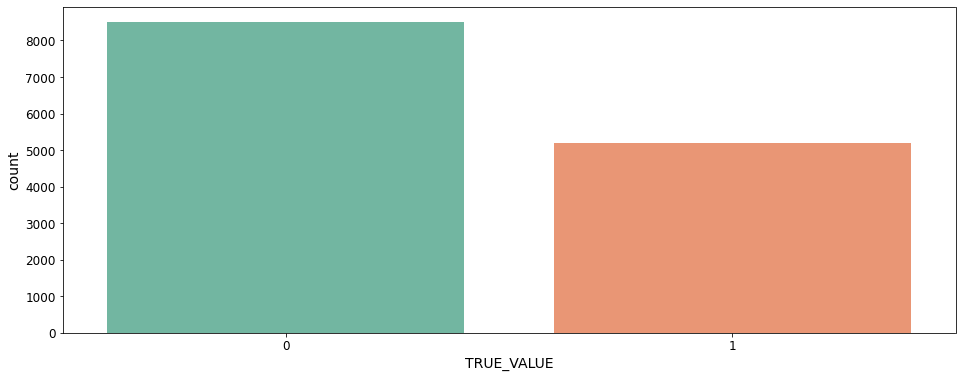

In [7]:
plt.figure(figsize=(16, 6))
sns.countplot(orig_data.TRUE_VALUE, palette="Set2")
plt.xticks(rotation=0)

In [8]:
xgb_clf = XGBClassifier()

In [9]:
#before running our model, check the imbalance problem of our trining dataset at the first
from sklearn.model_selection import cross_val_score#

# Ten-fold cross validation #
scores = cross_val_score(xgb_clf, X, y,
                        scoring = "accuracy", cv=10,#cv
                        n_jobs=-1)
def display_scores(scores):

    print("Scores:", scores)
    print("Mean:", scores.mean())
    print("Standard deviation:", scores.std())
    
display_scores(scores)

Scores: [0.85098612 0.82030679 0.7596786  0.88970051 0.95617239 0.87509131
 0.89627465 0.74799123 0.89254386 0.91666667]
Mean: 0.8605412133328206
Standard deviation: 0.06341078735607114


In [10]:
#Randomly seperate the traning dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

X_train.shape, X_test.shape, y_train.shape, y_test.shape

xgb_clf.fit(X_train, y_train)
y_pred_xgb = xgb_clf.predict(X_train)

D:\Software\lib\site-packages\xgboost\sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[10:54:58] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


In [11]:
xgb_clf.feature_importances_#

array([0.0142148 , 0.02058639, 0.0154189 , 0.01323927, 0.01006616,
       0.03544816, 0.02065528, 0.02670905, 0.01386739, 0.01758813,
       0.01407075, 0.0171557 , 0.04939359, 0.02523722, 0.01545956,
       0.02205101, 0.0144536 , 0.01637034, 0.02939531, 0.42301473,
       0.01926509, 0.0417236 , 0.02560633, 0.02216686, 0.03314206,
       0.01686177, 0.02683898], dtype=float32)

In [12]:
# show feature importance
for feature_name, score in zip(list(X.columns), xgb_clf.feature_importances_):
    print(feature_name, ":", score)

Rb : 0.014214804
Sr : 0.020586392
Pb : 0.015418896
Th : 0.013239275
U : 0.010066165
Nb : 0.03544816
Ta : 0.020655276
La : 0.026709054
Ce : 0.013867389
Ba : 0.017588133
Y : 0.01407075
Zr : 0.017155698
Ti : 0.04939359
P : 0.025237218
La/Yb : 0.015459556
Nb/Yb : 0.022051007
Zr/Y : 0.014453604
Ti/Y : 0.016370341
Nb/Th : 0.029395312
Nb/La : 0.42301473
Rb/Nb : 0.019265085
Sr/Nd : 0.0417236
Pb/Nb : 0.025606329
Pb/Nd : 0.02216686
Ba/Nb : 0.033142056
Ba/La : 0.016861774
U/Nb : 0.026838982


In [13]:
learning_rate = [ 0.1,0.2,0.5,0.6,0.7]
depth = [3, 4, 5, 6, 7]
min_split = [0.1,0.2,0.3,1]#
alpha1 = [0.1,0.3,0.5,0.7,0.9, 1]

In [14]:
xgb = XGBClassifier(objective='binary:logistic',
                    eval_metric = 'auc', tree_method='hist', seed=2023,importance_type = 'cover')#

In [ ]:
xgb_cv = GridSearchCV(xgb, param_grid = {'eta': learning_rate, 'gamma': min_split, 'max_depth': depth, 'alpha':alpha1}, 
                      cv=10, scoring='f1') #cv=10: tenfold cross-validation
xgb_cv.fit(X_train, y_train)

In [576]:
#calculate a mean value and standard deviation of the tenfold cross-validation scores of a best trained model
from sklearn.model_selection import cross_val_score

scores = cross_val_score(xgb_cv.best_estimator_, X_train, y_train,
                        scoring = "accuracy", cv=10,
                        n_jobs=-1)
def display_scores(scores):
    
    print("Scores:", scores)
    print("Mean:", scores.mean())
    print("Standard deviation:", scores.std())
    
display_scores(scores)

Scores: [0.95933264 0.95824635 0.94572025 0.94676409 0.95302714 0.95511482
 0.94780793 0.94780793 0.9394572  0.94154489]
Mean: 0.949482324359273
Standard deviation: 0.00639361156141271


In [578]:
#show the best score (mean value)
xgb_cv.best_score_

0.9314438125020015

In [579]:
#show parameters of the best model
xgb_cv.best_estimator_

XGBClassifier(alpha=0.7, base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, eta=0.5,
              eval_metric='auc', gamma=0.1, gpu_id=-1, importance_type='cover',
              interaction_constraints='', learning_rate=0.5, max_delta_step=0,
              max_depth=7, min_child_weight=1, missing=nan,
              monotone_constraints='()', n_estimators=100, n_jobs=36,
              num_parallel_tree=1, random_state=2023, reg_alpha=0.699999988,
              reg_lambda=1, scale_pos_weight=1, seed=2023, subsample=1,
              tree_method='hist', validate_parameters=1, verbosity=None)

In [580]:
features = list(X.columns)
importances = xgb_cv.best_estimator_.feature_importances_
indices = np.argsort(importances)

In [581]:
df4 = pd.DataFrame({'features':features,'importances':importances})
df4.to_excel('ML_model_training.xlsx')

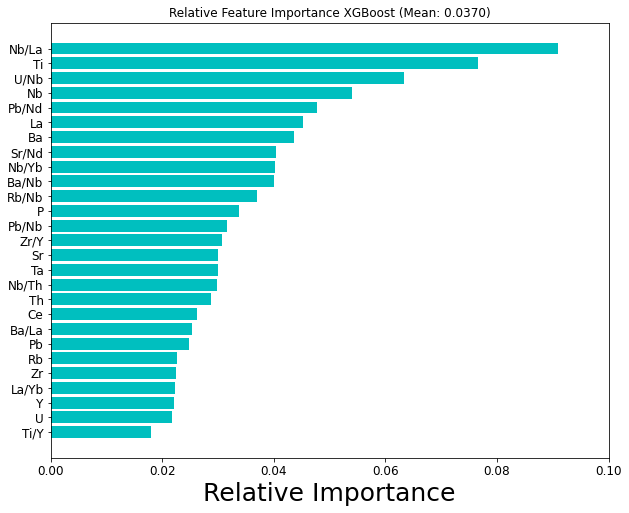

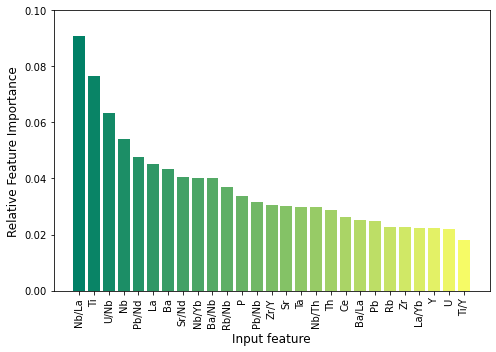

In [582]:
from matplotlib.pyplot import MultipleLocator
plt.figure(figsize=(10, 8))
mean_importance = df4['importances'].mean()
plt.barh(range(len(indices)), importances[indices], color='c', align='center')
plt.yticks(range(len(indices)), [features[i] for i in indices], fontsize=12)
plt.xticks(fontsize=12)
plt.xlabel('Relative Importance',fontsize=25)

x_major_locator=MultipleLocator(0.02)#
ax = plt.gca()
ax.xaxis.set_major_locator(x_major_locator)
plt.xlim((0,0.1))
plt.title('Relative Feature Importance XGBoost (Mean: {:.4f})'.format(mean_importance))
plt.savefig('ML_model_training1.pdf', dpi=500)
plt.show()
plt.rcParams["figure.figsize"] = (20, 10)

feature_importance = xgb_cv.best_estimator_.feature_importances_
feature_names = X.columns
feature_importance_df = pd.DataFrame({'Feature': feature_names, 'importances': feature_importance})
feature_importance_df = feature_importance_df.sort_values('importances', ascending=False)

mean_importance = feature_importance_df['importances'].mean()


from matplotlib import cm
my_colors = cm.summer(np.arange(feature_importance_df['Feature'].shape[0]) / feature_importance_df['Feature'].shape[0])

plt.figure(figsize=(7, 5))
plt.bar(feature_importance_df['Feature'], feature_importance_df['importances'],color = my_colors)
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)
plt.xlabel('Input feature',fontsize=12)
plt.ylabel('Relative Feature Importance',fontsize=12)

plt.xticks(rotation='90')
plt.ylim((0,0.1))

plt.tight_layout() 
plt.savefig('ML_model_training2.pdf', dpi=500)
plt.show()

In [583]:
# predict the test data set
xgb_test = xgb_cv.best_estimator_
xgb_test.fit(X_train,y_train)
y_test_pred = xgb_test.predict(X_test)

D:\Software\lib\site-packages\xgboost\sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


In [584]:
print('Accuracy: %.4f' % accuracy_score(y_test, y_test_pred))
print('ROC AUC: %.4f' % roc_auc_score(y_test, y_test_pred))
print('Precision: %.4f' % precision_score(y_true=y_test, y_pred=y_test_pred))
print('Recall: %.4f' % recall_score(y_true=y_test, y_pred=y_test_pred))
print('F1 Score: %.4f' % f1_score(y_true=y_test, y_pred=y_test_pred))

Accuracy: 0.9525
ROC AUC: 0.9449
Precision: 0.9618
Recall: 0.9123
F1 Score: 0.9364


In [585]:
from sklearn.metrics import classification_report

print(classification_report(y_true=y_test, y_pred=y_test_pred))

              precision    recall  f1-score   support

           0       0.95      0.98      0.96      2533
           1       0.96      0.91      0.94      1574

    accuracy                           0.95      4107
   macro avg       0.95      0.94      0.95      4107
weighted avg       0.95      0.95      0.95      4107



In [586]:
confmat = confusion_matrix(y_true=y_test, y_pred=y_test_pred)

print(confmat)

[[2476   57]
 [ 138 1436]]


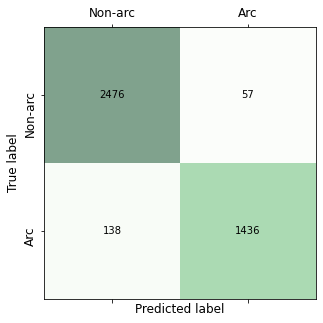

In [587]:
fig, ax = plt.subplots(figsize=(5, 5))
label_names =['Non-arc', 'Arc']
ax.matshow(confmat, cmap=plt.cm.Greens, alpha=0.5)

ax.set(xticks=np.arange(confmat.shape[1]),
       yticks=np.arange(confmat.shape[0]),
       xticklabels=label_names, yticklabels=label_names)
plt.yticks(rotation='90')
for i in range(confmat.shape[0]):
    for j in range(confmat.shape[1]):
        ax.text(x=j, y=i, s=confmat[i,j], va='center', ha='center')

x=['A','B']
y=['C','D']
# plt.text(1.25,0, '(b)',ha='right',fontsize=16) 
plt.xlabel('Predicted label',fontsize=12)
plt.ylabel('True label',fontsize=12)
plt.savefig('ML_model_confusion_matrix.pdf', dpi=800)
plt.show()

In [588]:
#predict the application dataset that is non label data

#We extract "Table-S4_Application dataset for prediction" from parental application dataset

predict_data = pd.read_excel ('Table-S4_Application dataset for prediction.xlsx')
x_predict_data = predict_data # process.fit_transform(predict_data)

In [589]:
predict_results = xgb_cv.best_estimator_.predict_proba(x_predict_data)

In [ ]:
predict_results

In [591]:
df = pd.DataFrame(data=predict_results)
df.to_excel('predict_results_application Archean basalts.xlsx')

In [ ]:
###Xgboost end